In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [20]:
cv2.namedWindow("image", cv2.WINDOW_NORMAL)
cv2.namedWindow("hand", cv2.WINDOW_NORMAL)

vc = cv2.VideoCapture(0)
rval, frame = vc.read()

image_x = 700
image_y = 100
image_w = 300
image_h = 300
pic_no = 0
total_pic = 1200
path = './gesture/3/'

flag_capturing = False

while True:
    
    if frame is not None: 
        
        frame = cv2.flip(frame, 1)
        
        cv2.rectangle(frame, (image_x,image_y), (image_x + image_w,image_y + image_h), (0,255,0), 2)
        cv2.imshow("image", frame)
        
        hand = frame[image_y:image_y+image_h, image_x:image_x+image_w]
        hand = cv2.cvtColor(hand, cv2.COLOR_BGR2GRAY)
        blur = cv2.GaussianBlur(hand, (11,11), 0)
        blur = cv2.medianBlur(blur, 15)
        thresh = cv2.threshold(blur,210,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
        thresh = cv2.bitwise_not(thresh)
        cv2.imshow("hand", thresh)
        
        if flag_capturing:
            pic_no += 1
            save_img = cv2.resize( thresh, (50,50) )
            save_img = np.array(save_img)
            cv2.imwrite(path + "/" + str(pic_no) + ".jpg", save_img)
        
    rval, frame = vc.read()
    keypress = cv2.waitKey(1)
    
    if pic_no == total_pic:
        flag_capturing = False
        break
    
    if keypress == ord('q'):
        break
    elif keypress == ord('c'):
        flag_capturing = True

vc.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

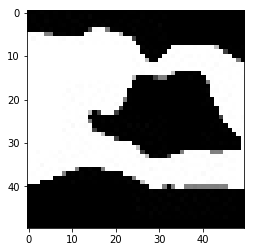

(50, 50)


In [23]:
images = os.listdir(path)
i = np.random.randint( len(images) )
img = plt.imread( path + images[i] )
plt.imshow(img, cmap = 'gray')
plt.show()
print img.shape